<a href="https://colab.research.google.com/github/duyguaran/deep-learning-examples/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g65KfbM4AsZ06TJ8EbQW6Yj0Qkt8waKWfJY-NurynBdrwCvMgmbKSE
Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
import warnings
warnings.filterwarnings('ignore')
from PIL import Image

In [3]:
train_messy = "/content/drive/MyDrive/kaggle/images/train/messy"
train_clean= "/content/drive/MyDrive/kaggle/images/train/clean"
test_messy= "/content/drive/MyDrive/kaggle/images/val/clean"
test_clean= "/content/drive/MyDrive/kaggle/images/val/messy"
image_size = 128

100%|██████████| 96/96 [00:29<00:00,  3.24it/s]


Text(0.5, 1.0, 'Messy and Clean Rooms in GrayScale')

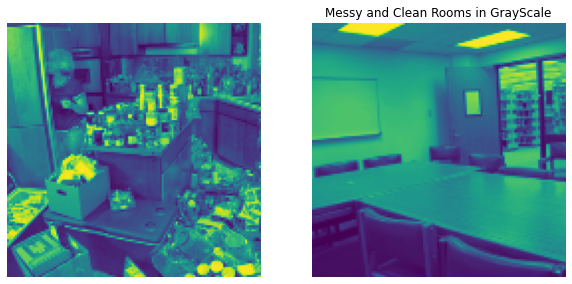

In [4]:
for image in tqdm(os.listdir(train_messy)): 
    path = os.path.join(train_messy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_clean)): 
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Messy and Clean Rooms in GrayScale")

In [5]:
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image1 in tqdm(os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(train_clean)): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data 

In [6]:
def test_data():
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in tqdm(os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(test_clean)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0) 
    return test_data 

In [7]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 10/10 [00:02<00:00,  3.34it/s]


In [8]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [9]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [10]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [11]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 128, 128)
Y shape:  (212, 1)


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [13]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (180, 16384)
X test flatten (32, 16384)


In [14]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 180)
x test:  (16384, 32)
y train:  (1, 180)
y test:  (1, 32)


In [16]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

## **2 Layer**

In [17]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [18]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [19]:
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [20]:
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [21]:
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [22]:
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.395642
Cost after iteration 100: 0.211071
Cost after iteration 200: 0.151798
Cost after iteration 300: 0.119870
Cost after iteration 400: 0.101868
Cost after iteration 500: 0.079530
Cost after iteration 600: 0.068575
Cost after iteration 700: 0.060546
Cost after iteration 800: 0.045046
Cost after iteration 900: 0.037683


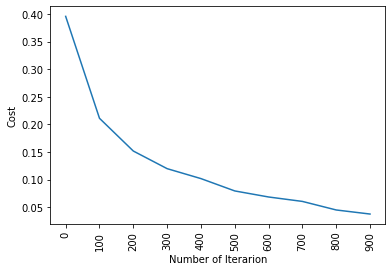

train accuracy: 100.0 %
test accuracy: 100.0 %


In [23]:
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=1000)

# **L Layer**

In [25]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T # before the keras

In [26]:
# Implementing with keras library
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
4/4 [==============================] - 14s 7ms/step - loss: 0.6927 - accuracy: 0.5508
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6777 - accuracy: 0.4883
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6498 - accuracy: 0.5238
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6217 - accuracy: 0.4894
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5755 - accuracy: 0.5133
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5397 - accuracy: 0.5060
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5100 - accuracy: 0.5019
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5141 - accuracy: 0.4560
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4914 - accuracy: 0.4821
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4544 - accuracy: 0.9487
Epoch 11/100
4/4 [==========